## Observations and Insights 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of mice.
print(len(mouse_metadata))

249


In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
 # getting JUST the duplicates with timepoint
cleaned_df=combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
cleaned_df
# just getting all mice and DROPPING duplicates
#cleaned_df=combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
#cleaned_df.head()



909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [67]:
#print(len(cleaned_df['Mouse ID'].unique()))

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=combined_df.loc[combined_df['Mouse ID']=='g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaner_df=combined_df.loc[combined_df['Mouse ID']!='g989']
cleaner_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice in the clean DataFrame.
mice_total=len(cleaner_df['Mouse ID'].unique())
mice_total

248

In [121]:
drugs=len(cleaner_df['Drug Regimen'].unique())
drugs

10

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:  
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grp_stats=cleaner_df[["Drug Regimen", "Tumor Volume (mm3)"]].describe()

#tumor_mean=cleaner_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()


,Tumor Volume (mm3)
count,1880.000000
mean,50.435293
std,8.914197
min,22.050126
25%,45.000000
50%,48.933454
75%,56.324075
max,78.567014


In [72]:
tumor_median=cleaner_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
tumor_median

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [73]:
tumor_var=cleaner_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
tumor_var

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [74]:
tumor_sem=cleaner_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
tumor_sem

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [88]:
# Assemble the resulting series into a single summary dataframe.


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaner_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})



,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


In [160]:
x_axis=np.arange(drugs)
tick_mice=[value for value in x_axis]
mice_drug=cleaner_df[["Mouse ID", "Drug Regimen"]].groupby("Drug Regimen").count()
mice_drug

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


Text(0.5, 1.0, 'Total Mice Tested on each Drug')

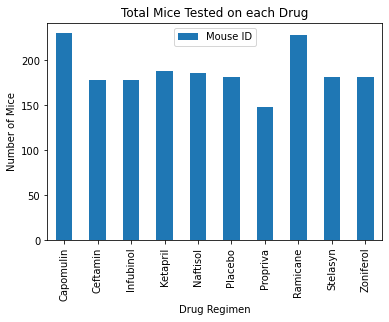

In [140]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug.plot(kind='bar')
plt.ylabel("Number of Mice")
plt.title("Total Mice Tested on each Drug")


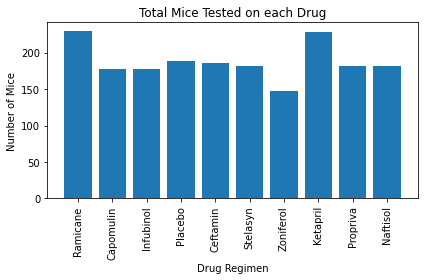

In [126]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_drug["Mouse ID"], width=0.8, bottom=None, align="center", data=None)
plt.xticks(tick_mice, cleaner_df["Drug Regimen"].unique(), rotation="vertical")
plt.title("Total Mice Tested on each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.savefig("../Images/total_mice_per_drug.png")

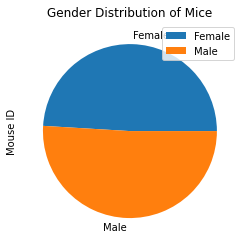

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice=cleaner_df[["Mouse ID", "Sex"]].groupby("Sex").count()
gender_mice.plot.pie(subplots=True)
plt.title("Gender Distribution of Mice")
plt.savefig("../Images/sex_distribution.png")

Text(0.5, 1.0, 'Gender Distribution of Mice')

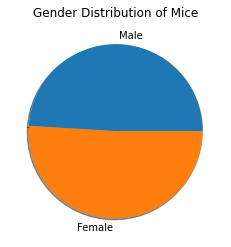

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice, explode=None, labels=cleaner_df["Sex"].unique(), colors=None, autopct=None, pctdistance=0.6, shadow=True, labeldistance=1.1)
plt.title("Gender Distribution of Mice")

## Quartiles, Outliers and Boxplots

In [189]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor=cleaner_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].groupby("Mouse ID").last()
final_tumor


,Timepoint,Tumor Volume (mm3)
Mouse ID,,
a203,45,67.973419
a251,45,65.525743
a262,45,70.717621
a275,45,62.999356
a366,30,63.440686
...,...,...
z435,10,48.710661
z578,45,30.638696
z581,45,62.754451


In [198]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_combined=pd.merge(cleaner_df, final_tumor, on = "Mouse ID")
final_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Timepoint_y,Tumor Volume (mm3)_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126
...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45,73.867845
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45,73.867845
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45,73.867845
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45,73.867845


In [82]:
# Put treatments into a list for for loop (and later for plot labels). just a list


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds. example given in class. copy and paste from example and change dfs or names or whatever
    

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [84]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [85]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
